In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
import pickle

In [2]:
import keras
from keras.utils import to_categorical

In [3]:
loc = r'D://datasets//archive//leapGestRecog//0'

In [4]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir(loc + str(0)):
    if not j.startswith('.'):                              
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [5]:
x_data = []
y_data = []
datacount = 0 
for i in range(0, 10): 
    for j in os.listdir(loc + str(i) + '//'):
        if not j.startswith('.'): 
            count = 0 
            for k in os.listdir(loc + 
                                str(i) + '//' + j + '//'):
                                
                img = Image.open(loc + 
                                 str(i) + '//' + j + '//' + k).convert('L')
                                
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

In [6]:
y_data = to_categorical(y_data)
x_data = x_data.reshape((datacount, 120, 320 , 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

In [16]:
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [17]:
from keras import models
from keras import layers

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
model.compile(loss = 'categorical_crossentropy' , 
              metrics = ['accuracy'],
             optimizer = 'rmsprop')

In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_validate, y_validate))

Epoch 1/10
210/210 [==============================] - 90s 427ms/step - loss: 0.3765 - accuracy: 0.8837 - val_loss: 0.0080 - val_accuracy: 0.9979
Epoch 2/10
210/210 [==============================] - 81s 388ms/step - loss: 0.0190 - accuracy: 0.9951 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/10
210/210 [==============================] - 78s 374ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 6.2092e-04 - val_accuracy: 0.9997
Epoch 4/10
210/210 [==============================] - 80s 381ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 5/10
210/210 [==============================] - 81s 386ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 6/10
210/210 [==============================] - 80s 380ms/step - loss: 4.7279e-04 - accuracy: 0.9999 - val_loss: 0.0036 - val_accuracy: 0.9997
Epoch 7/10
210/210 [==============================] - 84s 399ms/step - loss: 8.6347e-04 - accuracy: 0.9998 - val_loss: 0.0

In [21]:
loss_data = pd.DataFrame(model.history.history)

In [22]:
loss_data.head(1)

,loss,accuracy,val_loss,val_accuracy
0,0.376547,0.883657,0.008021,0.997879


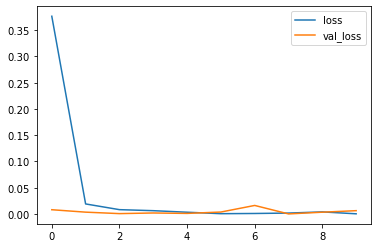

In [23]:
loss_data[['loss','val_loss']].plot()

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_test.shape

(3300, 10)

In [53]:
results = []
for i in y_pred:
    results.append(np.argmax(i))

In [54]:
results

[1,
 1,
 6,
 1,
 8,
 9,
 1,
 0,
 9,
 3,
 8,
 3,
 2,
 6,
 1,
 3,
 3,
 9,
 3,
 5,
 0,
 6,
 8,
 3,
 7,
 9,
 2,
 2,
 7,
 2,
 0,
 1,
 3,
 8,
 0,
 5,
 2,
 9,
 7,
 8,
 3,
 3,
 6,
 2,
 1,
 1,
 5,
 9,
 5,
 6,
 0,
 4,
 6,
 6,
 4,
 0,
 2,
 1,
 0,
 4,
 5,
 6,
 7,
 7,
 4,
 0,
 8,
 3,
 1,
 2,
 6,
 7,
 2,
 0,
 6,
 8,
 2,
 2,
 9,
 5,
 5,
 6,
 0,
 8,
 1,
 4,
 8,
 2,
 0,
 6,
 0,
 2,
 7,
 0,
 3,
 9,
 8,
 1,
 6,
 1,
 1,
 0,
 2,
 0,
 1,
 5,
 3,
 6,
 0,
 5,
 4,
 7,
 1,
 7,
 2,
 5,
 4,
 2,
 1,
 9,
 8,
 7,
 3,
 3,
 3,
 7,
 2,
 8,
 0,
 2,
 4,
 8,
 1,
 9,
 6,
 4,
 0,
 6,
 2,
 8,
 3,
 5,
 5,
 2,
 4,
 6,
 3,
 5,
 7,
 0,
 6,
 9,
 0,
 3,
 7,
 4,
 0,
 5,
 2,
 3,
 4,
 3,
 0,
 4,
 2,
 9,
 1,
 9,
 1,
 0,
 2,
 9,
 4,
 5,
 5,
 4,
 6,
 4,
 1,
 0,
 6,
 6,
 0,
 8,
 3,
 6,
 0,
 9,
 9,
 4,
 2,
 9,
 8,
 8,
 6,
 4,
 6,
 0,
 4,
 7,
 0,
 2,
 1,
 9,
 0,
 0,
 4,
 6,
 5,
 5,
 2,
 4,
 7,
 2,
 5,
 0,
 3,
 6,
 0,
 6,
 3,
 0,
 2,
 1,
 9,
 9,
 5,
 2,
 2,
 4,
 1,
 3,
 5,
 1,
 6,
 6,
 9,
 2,
 6,
 3,
 5,
 8,
 6,
 6,
 8,
 6,
 1,
 7,
 8,
 0,


In [29]:
model.predict(X_test[-1:])

array([[7.4913608e-33, 8.3431840e-37, 5.6169502e-36, 5.7036810e-15,
        5.0432725e-34, 0.0000000e+00, 1.4954937e-11, 7.1860217e-37,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [34]:
img = cv2.imread(r'D:\leapgestrecog\leapGestRecog\00\01_palm\frame_00_01_0014.png')

In [35]:
cv2.imshow(".",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\highgui\src\window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [98]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [99]:
img.shape

(240, 640)

In [100]:
img = cv2.resize(img,(320, 120))

In [101]:
img.shape

(120, 320)

In [102]:
img = np.array(img, dtype = 'float32')

In [103]:
img.shape

(120, 320)

In [106]:
model.predict(img.reshape(1,120,320,1))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
model.save('HAND_DETECTION')

INFO:tensorflow:Assets written to: HAND_DETECTION\assets


In [109]:
filename = '_model_.sav'
pickle.dump(model, open(filename, 'wb'))
